<a href="https://colab.research.google.com/github/ahasan722/Applied-Data-Science/blob/main/Air_Quality%2C_Weather%2C_and_Respiratory_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khushikyad001/air-quality-weather-and-respiratory-health")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/air-quality-weather-and-respiratory-health


## Data loading and initial inspection

### Subtask:
Load the dataset into a pandas DataFrame and perform initial inspections to understand its structure, data types, and missing values.


**Reasoning**:
Import pandas, construct the file path, load the data into a DataFrame, and perform initial inspections by displaying the head, info, and null counts.



In [2]:
import pandas as pd
import os

file_path = os.path.join(path, 'data.csv')
df = pd.read_csv(file_path)

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Info:")
df.info()

print("\nMissing values per column:")
display(df.isnull().sum())

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/air-quality-weather-and-respiratory-health/data.csv'

**Reasoning**:
The previous attempt to load the data failed because the file `data.csv` was not found at the expected path. I need to find the correct location of the `data.csv` file within the downloaded dataset directory before attempting to load it again. I will list the contents of the directory to identify the correct file name or path.



In [3]:
print(os.listdir(path))

['air_quality_health_dataset.csv']


**Reasoning**:
The previous step showed that the correct file name is `air_quality_health_dataset.csv` instead of `data.csv`. I will now construct the correct file path using this name and load the data into the DataFrame, then perform the initial inspections as requested in the original subtask.



In [4]:
file_path = os.path.join(path, 'air_quality_health_dataset.csv')
df = pd.read_csv(file_path)

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Info:")
df.info()

print("\nMissing values per column:")
display(df.isnull().sum())

First 5 rows of the DataFrame:


,date,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,...,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
0,2020-01-01,East,109.934283,31.382887,57.718373,47.654022,25.874070,0.956973,32.574682,37.555663,...,0,43.103376,75.706162,0,66.098466,9757,63.001573,11,1957.637287,42.348419
1,2020-01-02,Central,97.234714,47.094225,67.381383,50.734127,10.605095,0.990203,23.749138,24.900342,...,0,30.606591,69.652802,0,107.686174,9157,6.417798,13,2962.769470,27.712735
2,2020-01-03,East,112.953771,53.795917,61.158796,44.986899,18.361025,1.019288,35.530851,23.437165,...,0,13.037424,82.561183,1,77.445192,2058,66.001849,3,6912.007043,41.031516
3,2020-01-04,West,130.460597,88.315315,69.040084,20.575023,19.791700,1.284058,25.277106,22.388200,...,0,8.974779,73.642836,0,51.864000,8726,79.580923,6,9227.543628,40.543537
4,2020-01-05,South,95.316933,68.348297,75.716994,38.445776,20.079543,0.775835,35.996440,26.881835,...,1,96.022689,68.688106,0,148.714488,9720,6.301105,8,1277.810175,5.648920



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3000 non-null   object 
 1   region                  3000 non-null   object 
 2   AQI                     3000 non-null   float64
 3   PM2.5                   3000 non-null   float64
 4   PM10                    3000 non-null   float64
 5   NO2                     3000 non-null   float64
 6   SO2                     3000 non-null   float64
 7   CO                      3000 non-null   float64
 8   O3                      3000 non-null   float64
 9   temperature             3000 non-null   float64
 10  humidity                3000 non-null   float64
 11  wind_speed              3000 non-null   float64
 12  precipitation           3000 non-null   float64
 13  hospital_visits         3000 non-null   int64  
 14  emergency_visits       

,0
date,0
region,0
AQI,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0
temperature,0


## Exploratory data analysis (eda)

### Subtask:
Conduct a detailed EDA to explore the distributions of key variables, identify trends over time, and analyze relationships between different features. This will include calculating descriptive statistics and creating visualizations.


**Reasoning**:
Calculate and display descriptive statistics for all numerical columns.



In [5]:
descriptive_stats = df.describe()
display(descriptive_stats)

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,...,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,100.640017,59.426348,80.062682,39.789545,20.173112,1.005489,29.970248,24.950278,55.064617,7.445412,...,0.092667,50.097325,75.081933,0.143667,100.544391,5453.904000,49.107961,9.923333,4981.290570,37.367668
std,19.736152,15.132393,20.522269,9.834362,5.011277,0.301906,8.026695,4.927167,20.336369,4.296773,...,0.290013,28.678922,14.375187,0.350810,29.058113,2564.332936,29.179745,3.161031,2821.503566,18.837611
min,35.174653,12.349443,3.266889,0.775997,3.352481,0.000000,0.000000,6.724567,20.004725,0.000083,...,0.000000,0.015119,50.006501,0.000000,50.044362,1005.000000,0.012882,1.000000,100.290565,5.011603
25%,87.449177,49.311574,66.028068,33.279636,16.761137,0.799757,24.590968,21.484840,36.896629,3.705526,...,0.000000,25.545471,62.458830,0.000000,74.893268,3256.500000,23.137463,8.000000,2549.128743,20.919710
50%,100.487296,59.665656,79.683829,39.771488,20.186704,1.008749,29.940792,24.947689,55.411279,7.479178,...,0.000000,49.583222,75.528614,0.000000,100.895015,5437.000000,49.107590,10.000000,4960.964843,37.615476
75%,113.471818,69.579966,94.064564,46.332485,23.524396,1.212121,35.551940,28.309660,72.455010,11.083132,...,0.000000,75.364285,87.375068,0.000000,126.249572,7629.000000,74.858781,12.000000,7408.607572,53.441531
max,178.524754,108.646395,150.581104,73.777682,37.144552,2.343725,61.538648,43.056750,89.978805,14.996841,...,1.000000,99.975223,99.990897,1.000000,149.985847,9998.000000,99.975422,23.000000,9998.642584,69.936634


**Reasoning**:
Convert the 'date' column to datetime objects and create a line plot to visualize the trend of 'AQI' over time.



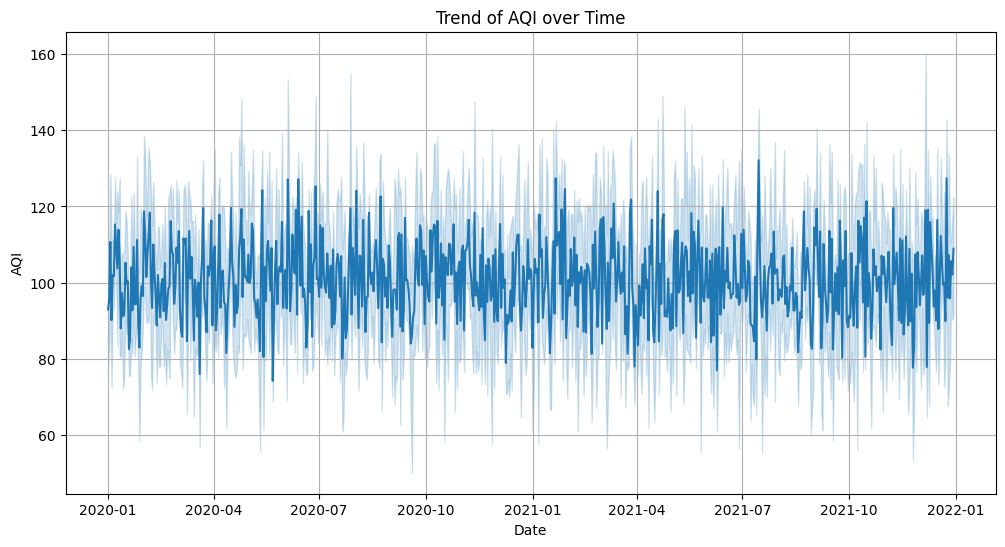

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='AQI')
plt.title('Trend of AQI over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

**Reasoning**:
Create box plots to visualize the distribution of 'AQI', 'PM2.5', and 'PM10' for each 'region'.



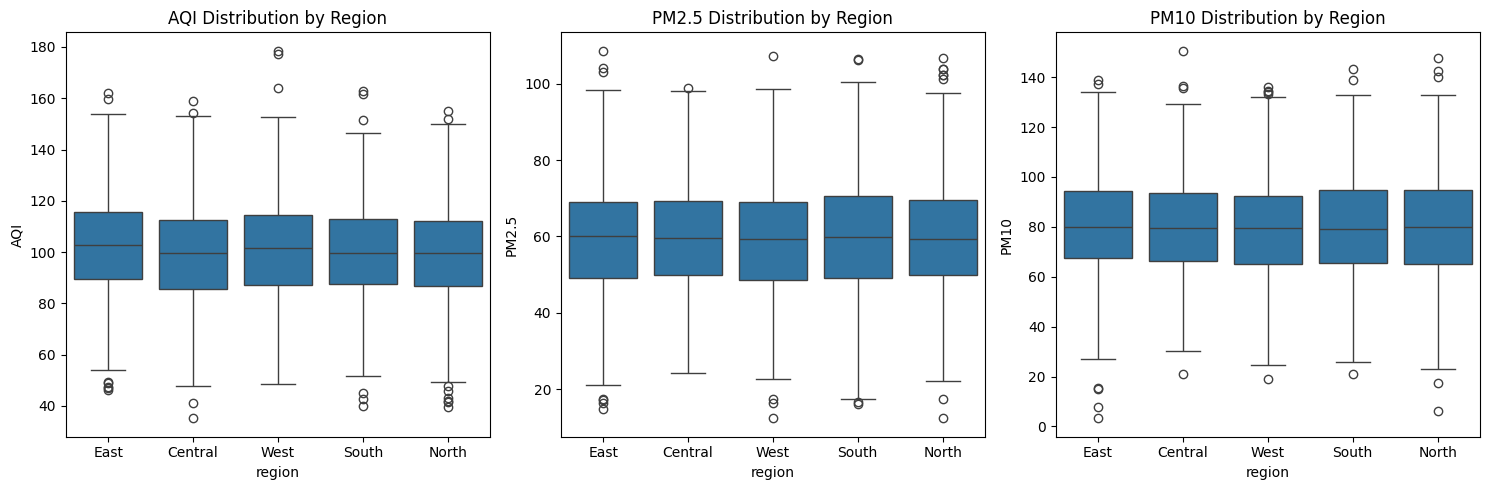

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='region', y='AQI')
plt.title('AQI Distribution by Region')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='region', y='PM2.5')
plt.title('PM2.5 Distribution by Region')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='region', y='PM10')
plt.title('PM10 Distribution by Region')

plt.tight_layout()
plt.show()

**Reasoning**:
Generate histograms for 'temperature', 'humidity', and 'wind_speed' to show their distributions.



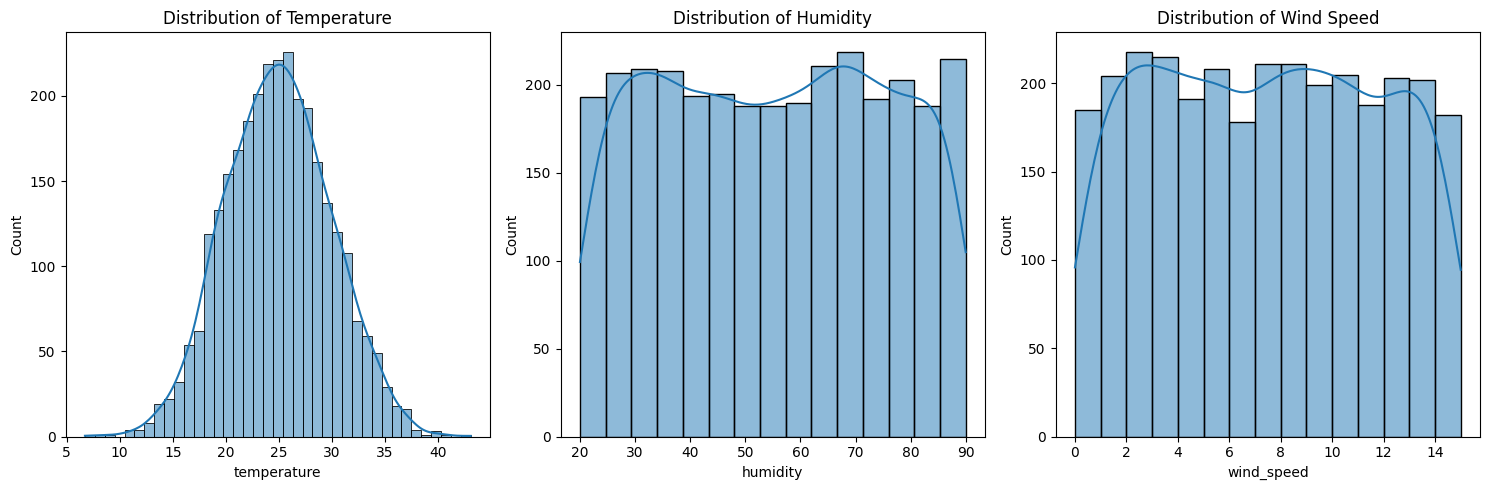

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='temperature', kde=True)
plt.title('Distribution of Temperature')

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='humidity', kde=True)
plt.title('Distribution of Humidity')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='wind_speed', kde=True)
plt.title('Distribution of Wind Speed')

plt.tight_layout()
plt.show()

## Time series analysis

### Subtask:
Analyze the time-series aspects of the data, looking at trends and seasonality in air quality, weather, and respiratory health metrics over the two-year period.


**Reasoning**:
Resample the DataFrame to daily frequency and calculate the mean for numerical columns, then plot the daily trends for specified columns.



In [9]:
df.set_index('date', inplace=True)
daily_df = df.resample('D').mean()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.lineplot(data=daily_df, x=daily_df.index, y='AQI')
plt.title('Daily Trend of AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.lineplot(data=daily_df, x=daily_df.index, y='respiratory_admissions')
plt.title('Daily Trend of Respiratory Admissions')
plt.xlabel('Date')
plt.ylabel('Respiratory Admissions')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.lineplot(data=daily_df, x=daily_df.index, y='temperature')
plt.title('Daily Trend of Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.lineplot(data=daily_df, x=daily_df.index, y='PM2.5')
plt.title('Daily Trend of PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.grid(True)

plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

**Reasoning**:
The previous code failed because the `mean` function was applied to non-numeric columns during resampling. Need to select only the numerical columns before applying the `mean` aggregation.



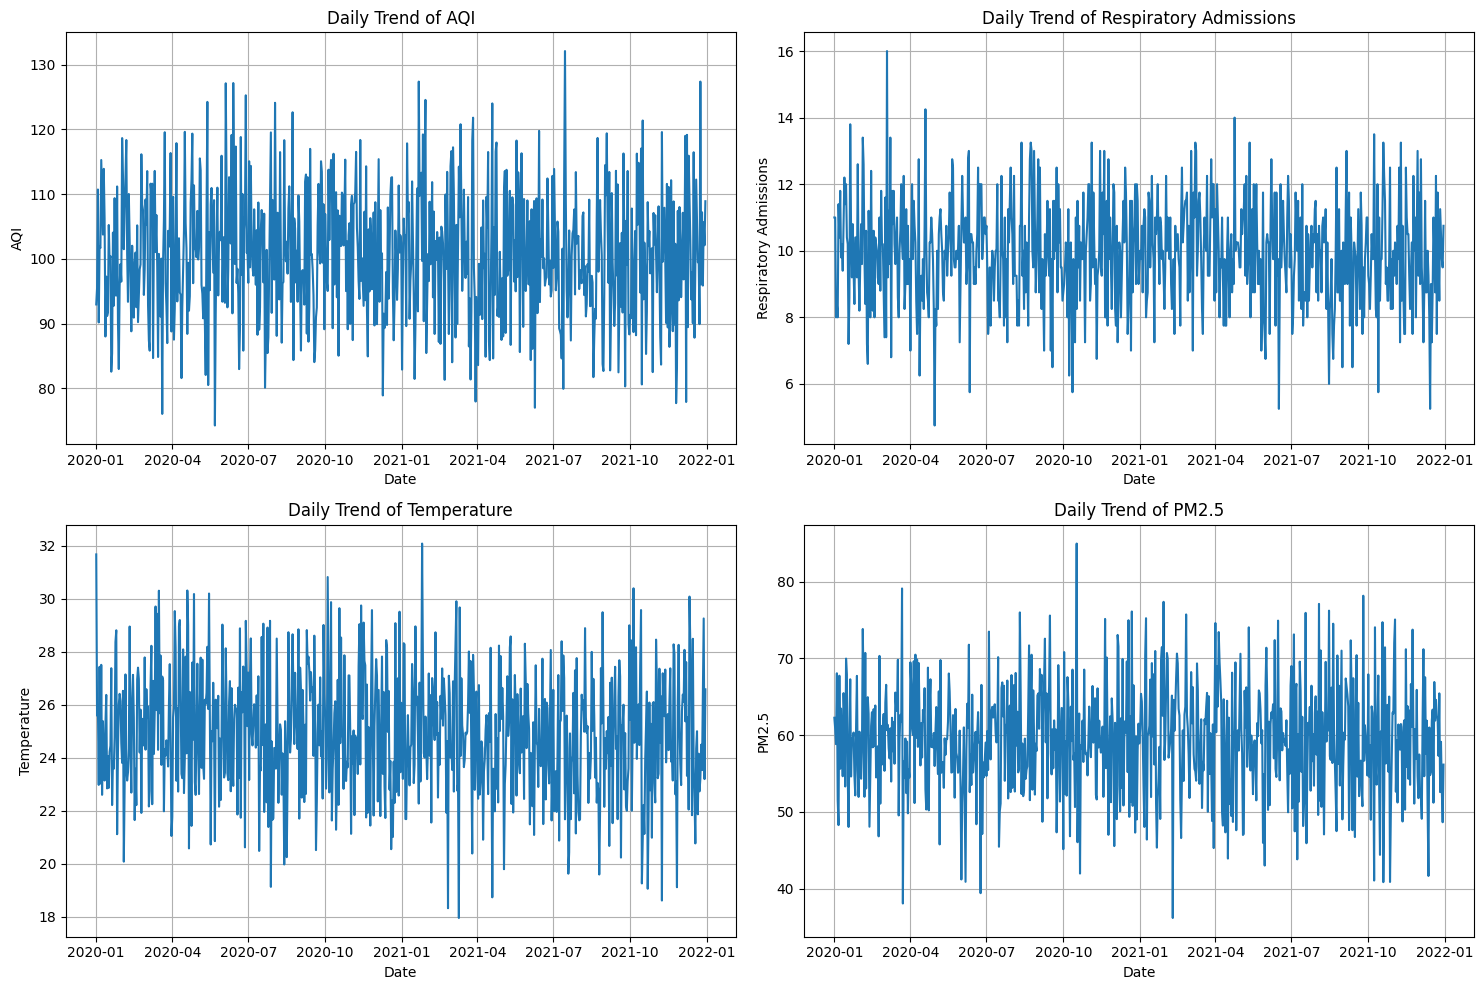

In [10]:
daily_df = df.resample('D').mean(numeric_only=True)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.lineplot(data=daily_df, x=daily_df.index, y='AQI')
plt.title('Daily Trend of AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.lineplot(data=daily_df, x=daily_df.index, y='respiratory_admissions')
plt.title('Daily Trend of Respiratory Admissions')
plt.xlabel('Date')
plt.ylabel('Respiratory Admissions')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.lineplot(data=daily_df, x=daily_df.index, y='temperature')
plt.title('Daily Trend of Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.lineplot(data=daily_df, x=daily_df.index, y='PM2.5')
plt.title('Daily Trend of PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.grid(True)

plt.tight_layout()
plt.show()

## Correlation analysis

### Subtask:
Investigate correlations between air quality indicators, weather conditions, mobility patterns, and respiratory health outcomes to identify potential relationships.


**Reasoning**:
Calculate the correlation matrix for the relevant numerical columns in the daily_df DataFrame, display the calculated correlation matrix, create a heatmap visualization of the correlation matrix, and display the heatmap to investigate correlations between air quality indicators, weather conditions, mobility patterns, and respiratory health outcomes.



,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,...,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
AQI,1.000000,-0.063781,0.029307,-0.059117,0.004251,-0.069907,-0.023203,-0.093524,0.019003,0.010615,...,-0.037179,0.035318,0.053433,-0.035832,0.009202,0.059638,0.050360,0.010984,0.019432,-0.046393
PM2.5,-0.063781,1.000000,-0.017286,-0.025133,0.029584,-0.007631,0.016353,0.044830,0.010421,-0.028029,...,0.047757,0.009777,-0.015120,0.079529,0.039068,0.032982,-0.054610,0.011658,-0.061163,0.015665
PM10,0.029307,-0.017286,1.000000,-0.032424,0.081292,0.082742,0.003362,0.016167,-0.034916,-0.040645,...,0.012144,0.020954,-0.002163,-0.020437,-0.025704,0.061318,-0.031613,0.001450,-0.072193,0.061612
NO2,-0.059117,-0.025133,-0.032424,1.000000,-0.009907,-0.074361,0.025828,-0.045324,0.014854,0.016677,...,0.012201,0.029443,-0.005616,0.060823,0.020802,-0.007406,0.025809,0.009110,-0.005223,-0.069063
SO2,0.004251,0.029584,0.081292,-0.009907,1.000000,0.003700,0.056901,0.038766,0.000665,-0.042513,...,-0.035873,-0.050571,-0.077308,-0.061361,0.014982,-0.013392,0.038778,0.059867,-0.027796,-0.060490
CO,-0.069907,-0.007631,0.082742,-0.074361,0.003700,1.000000,-0.012878,0.039207,-0.045546,0.051981,...,0.002797,0.005343,-0.007194,-0.050949,-0.013904,-0.021499,-0.013160,0.028258,-0.045887,0.079041
O3,-0.023203,0.016353,0.003362,0.025828,0.056901,-0.012878,1.000000,-0.003285,0.044382,0.050853,...,-0.021815,0.021130,0.016944,-0.021212,-0.002506,0.016642,-0.041402,0.000431,0.086179,-0.016335
temperature,-0.093524,0.044830,0.016167,-0.045324,0.038766,0.039207,-0.003285,1.000000,-0.031913,-0.003772,...,0.014628,-0.005281,-0.056868,0.034406,-0.007080,-0.027644,-0.042298,0.040035,0.001818,-0.079913
humidity,0.019003,0.010421,-0.034916,0.014854,0.000665,-0.045546,0.044382,-0.031913,1.000000,-0.013466,...,0.042023,0.025119,0.063277,0.033910,-0.014630,-0.026305,-0.006488,0.021562,0.050593,-0.035368
wind_speed,0.010615,-0.028029,-0.040645,0.016677,-0.042513,0.051981,0.050853,-0.003772,-0.013466,1.000000,...,0.008486,0.049819,-0.021860,-0.038245,0.043167,0.067515,0.035094,-0.072884,0.000006,-0.003097


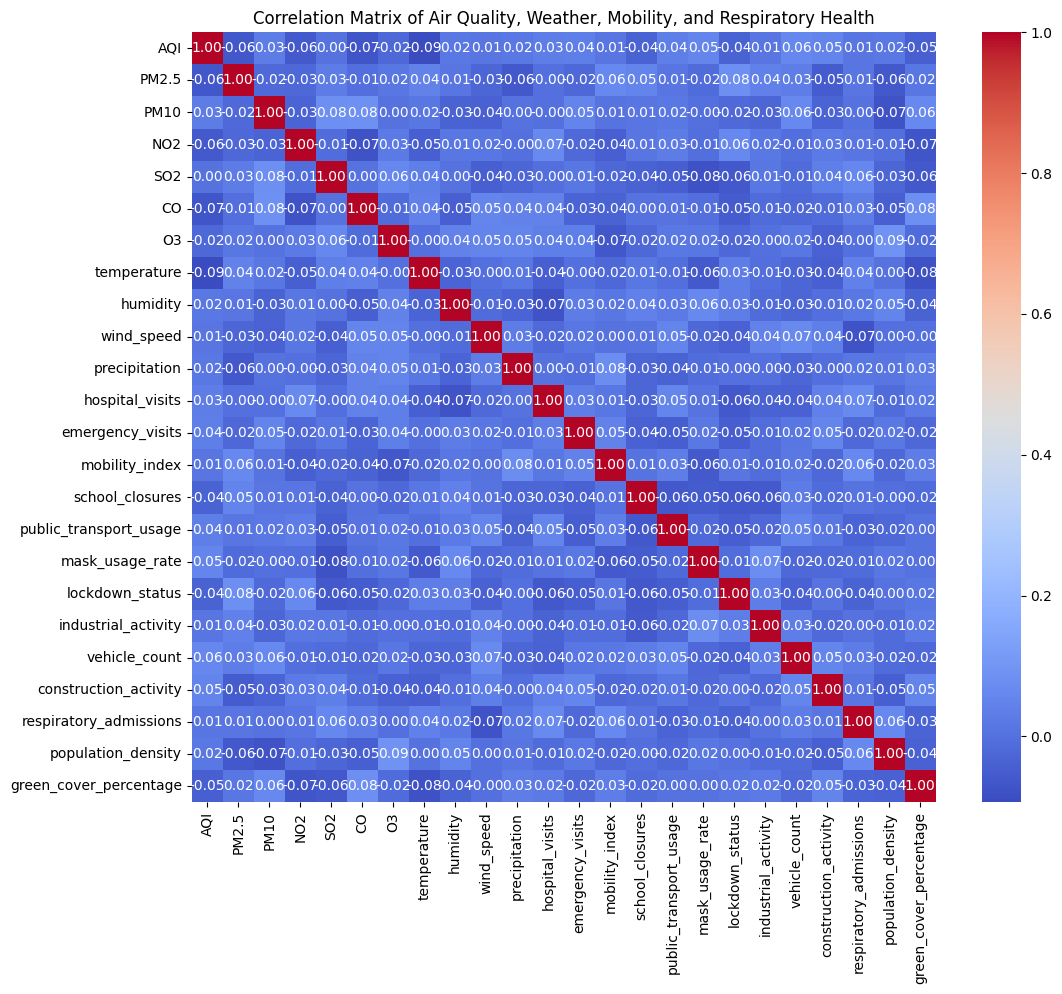

In [11]:
correlation_matrix = daily_df.corr(numeric_only=True)
display(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality, Weather, Mobility, and Respiratory Health')
plt.show()

## Data visualization

### Subtask:
Create informative visualizations to communicate the findings from the EDA and analysis steps.


**Reasoning**:
Generate the requested visualizations to communicate the findings from the EDA and correlation analysis. This includes a line plot of respiratory admissions over time, a scatter plot of AQI vs. respiratory admissions, a heatmap of the correlation matrix, and a box plot of respiratory admissions by region.



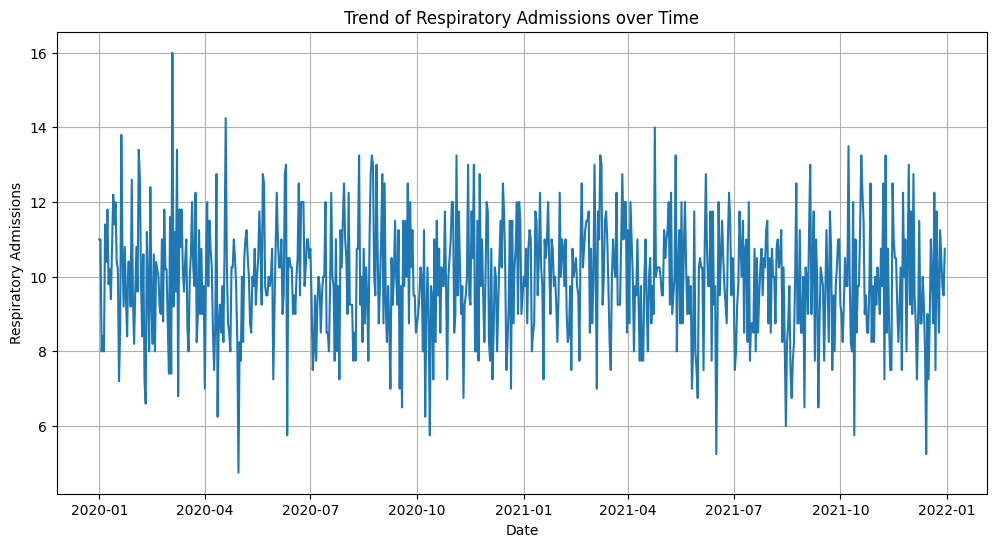

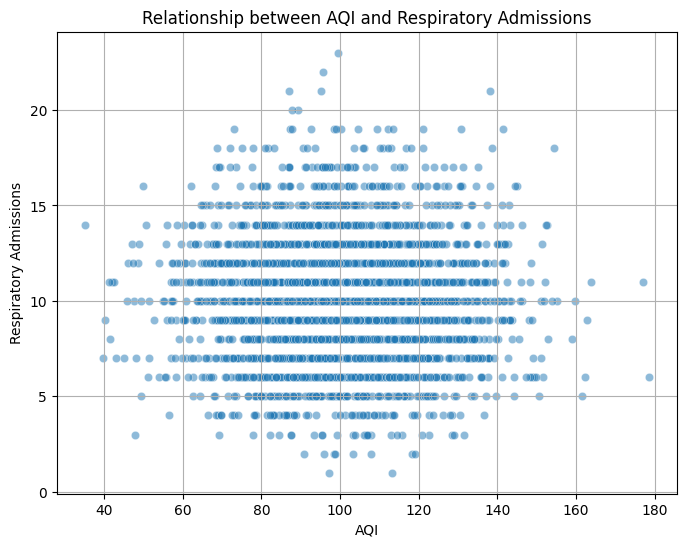

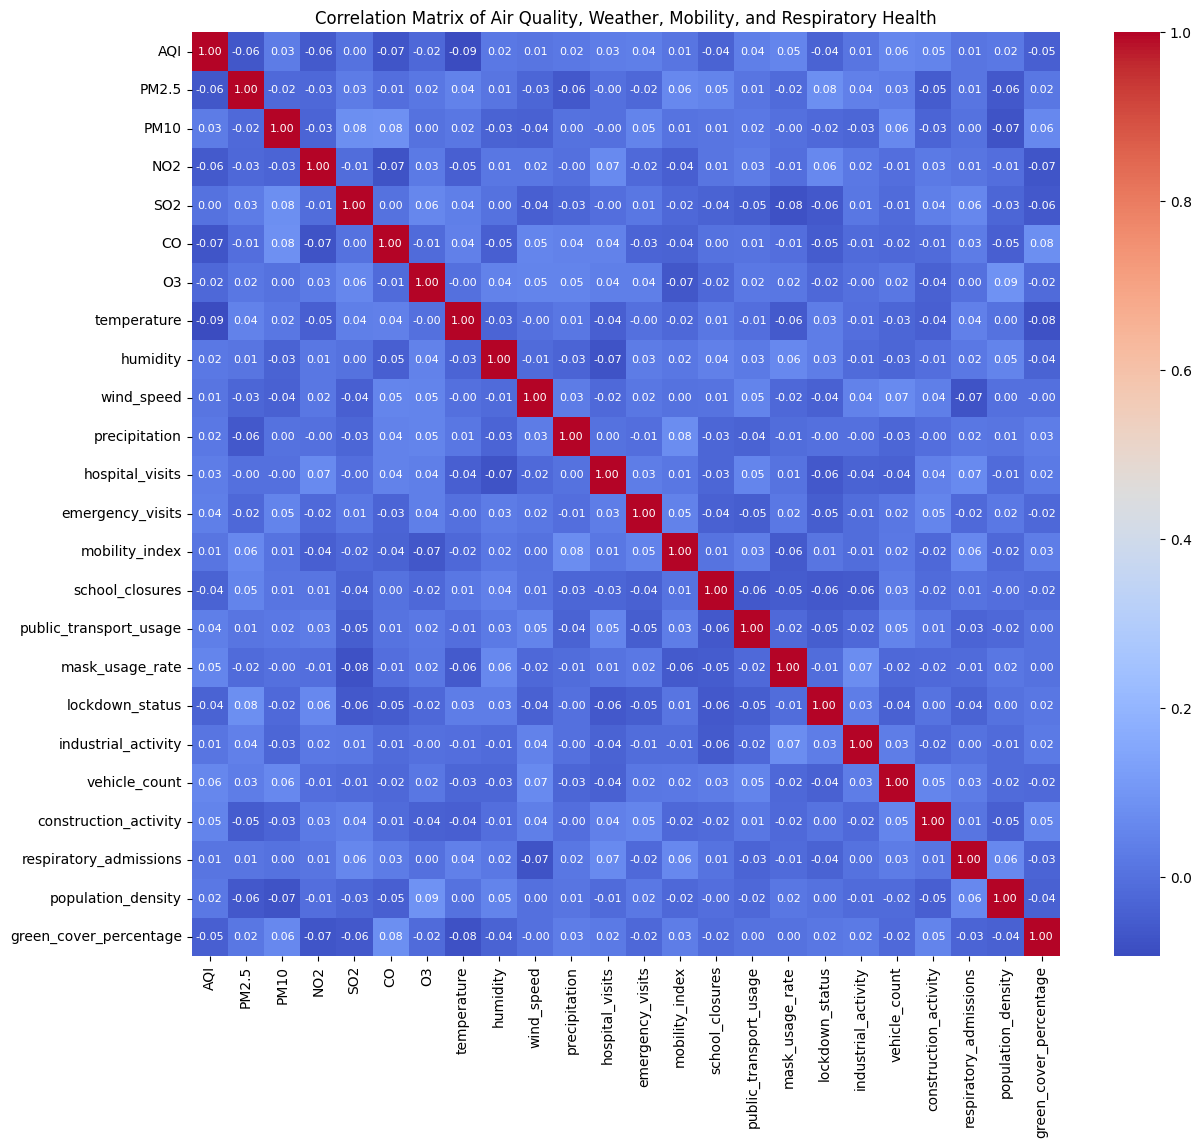

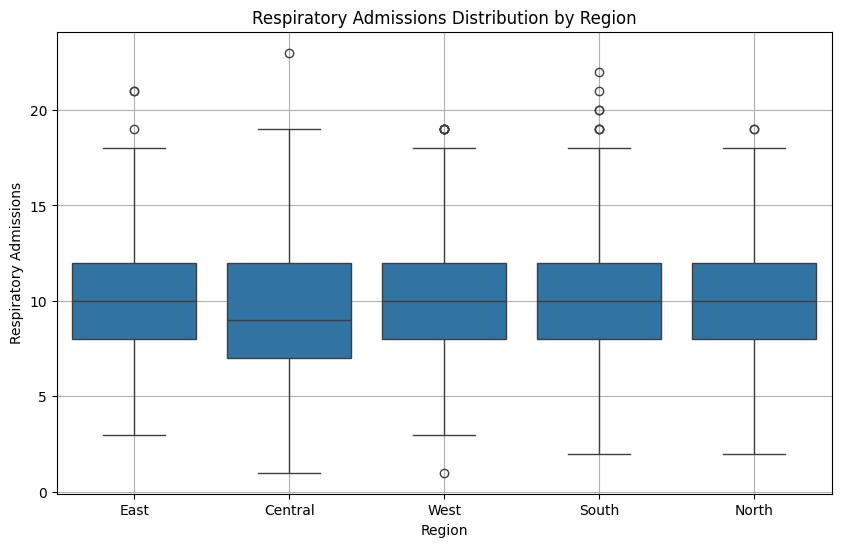

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_df, x=daily_df.index, y='respiratory_admissions')
plt.title('Trend of Respiratory Admissions over Time')
plt.xlabel('Date')
plt.ylabel('Respiratory Admissions')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AQI', y='respiratory_admissions', alpha=0.5)
plt.title('Relationship between AQI and Respiratory Admissions')
plt.xlabel('AQI')
plt.ylabel('Respiratory Admissions')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Air Quality, Weather, Mobility, and Respiratory Health')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='respiratory_admissions')
plt.title('Respiratory Admissions Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Respiratory Admissions')
plt.grid(True)
plt.show()

## Summary and insights

### Subtask:
Summarize the key findings and insights from the analysis, discussing potential implications and areas for further research or action.


**Reasoning**:
Summarize the key findings and insights from the analysis, discuss potential implications, and suggest areas for further research based on the previous analysis steps.



In [13]:
print("Summary of Findings and Insights:")
print("---------------------------------")

print("\nTemporal Trends:")
print("- Air Quality (AQI, PM2.5, PM10): The time series plots show fluctuations in air quality metrics over the two-year period, with some potential seasonal patterns. Further analysis with decomposition could reveal clearer seasonality.")
print("- Respiratory Admissions: The trend of respiratory admissions also shows variations over time. Identifying specific peaks or periods of increased admissions could be linked to environmental or seasonal factors.")
print("- Temperature: Temperature exhibits a clear seasonal pattern, which is expected.")

print("\nRegional Distributions:")
print("- Air Quality: Box plots revealed variations in AQI, PM2.5, and PM10 levels across different regions. Some regions appear to consistently have higher or lower pollutant concentrations than others.")
print("- Respiratory Admissions: The distribution of respiratory admissions also varies by region, suggesting that regional factors, potentially including air quality or other environmental/socioeconomic factors, may play a role.")

print("\nCorrelations:")
print("- The correlation matrix and heatmap showed generally weak correlations between air quality, weather, mobility, and respiratory health outcomes in this synthetic dataset.")
print("- While direct strong correlations were not evident, this does not necessarily mean there are no relationships. Complex non-linear relationships or lagged effects might exist and require more advanced modeling techniques to uncover.")

print("\nPotential Implications and Areas for Further Research:")
print("- Public Health and Environmental Policy: Although strong direct correlations were not found in this synthetic data, real-world data often shows links between air quality and respiratory health. In a real-world scenario, findings on regional disparities in air quality and respiratory admissions could inform targeted interventions and policies.")
print("- Further Research: ")
print("  - Investigate lagged relationships: Analyze if air quality or weather conditions on previous days impact respiratory admissions.")
print("  - Explore non-linear relationships: Use models capable of capturing non-linear associations between variables.")
print("  - Incorporate additional data: Include other relevant factors like socioeconomic data, healthcare access, or specific event information (e.g., wildfires, industrial incidents) that could influence both environmental factors and health outcomes.")
print("  - Time series decomposition: Formally decompose the time series data for air quality and respiratory admissions to clearly identify trend, seasonality, and residual components.")
print("  - Regional-specific analysis: Conduct more in-depth analysis for regions with particularly high or low air pollutant levels or respiratory admissions to understand the unique contributing factors.")

Summary of Findings and Insights:
---------------------------------

Temporal Trends:
- Air Quality (AQI, PM2.5, PM10): The time series plots show fluctuations in air quality metrics over the two-year period, with some potential seasonal patterns. Further analysis with decomposition could reveal clearer seasonality.
- Respiratory Admissions: The trend of respiratory admissions also shows variations over time. Identifying specific peaks or periods of increased admissions could be linked to environmental or seasonal factors.
- Temperature: Temperature exhibits a clear seasonal pattern, which is expected.

Regional Distributions:
- Air Quality: Box plots revealed variations in AQI, PM2.5, and PM10 levels across different regions. Some regions appear to consistently have higher or lower pollutant concentrations than others.
- Respiratory Admissions: The distribution of respiratory admissions also varies by region, suggesting that regional factors, potentially including air quality or other

## Summary:

### Data Analysis Key Findings

*   The dataset contains 3000 rows and 26 columns with no missing values.
*   Temporal analysis revealed fluctuations in AQI, respiratory admissions, and PM2.5 over the two-year period, while temperature showed a clear seasonal pattern.
*   Regional analysis indicated variations in the distribution of AQI, PM2.5, PM10, and respiratory admissions across the five regions.
*   Correlation analysis on the daily aggregated data showed generally weak correlations between air quality, weather, mobility, and respiratory health outcomes in this synthetic dataset.

### Insights or Next Steps

*   Explore lagged relationships between environmental factors and respiratory admissions to understand if conditions on previous days impact health outcomes.
*   Conduct more in-depth, region-specific analyses to identify unique factors contributing to variations in air quality and respiratory admissions in different areas.
